Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8675 - loss: 0.4993 - val_accuracy: 0.9569 - val_loss: 0.1432
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9594 - loss: 0.1331 - val_accuracy: 0.9683 - val_loss: 0.1047
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0871 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9813 - loss: 0.0616 - val_accuracy: 0.9781 - val_loss: 0.0756
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0477 - val_accuracy: 0.9742 - val_loss: 0.0799
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9771 - val_loss: 0.0713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.9786 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0215 -

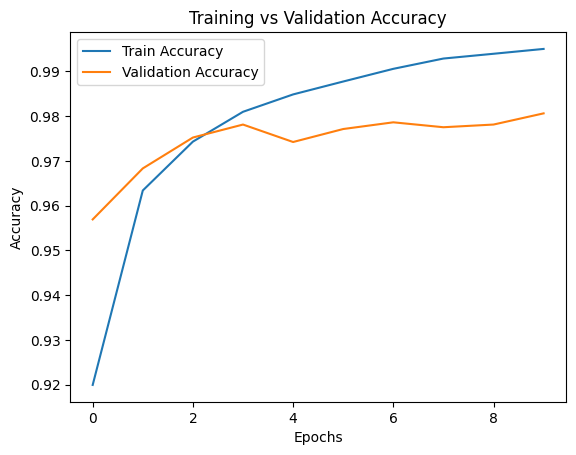

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Digit: 7


In [2]:

# WEEK 3 -> FULL TENSORFLOW CODE

# Importing Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normalizing the Data bw (0 to 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Custom Layers

# Custom Flatten Layer
class CustomFlattenLayer(tf.keras.layers.Layer):

    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))



# Custom Dense & ReLU Layer
class CustomDenseReluLayer(tf.keras.layers.Layer):

    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):

        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='random_normal',
            trainable=True
        )

        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):

        z = tf.matmul(inputs, self.w) + self.b
        return tf.nn.relu(z)



# Custom Dense & Softmax Layer
class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):

    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):

        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='random_normal',
            trainable=True
        )

        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):

        z = tf.matmul(inputs, self.w) + self.b
        return tf.nn.softmax(z)

# Building Model using Custom Layers

model = Sequential([

    CustomFlattenLayer(),

    CustomDenseReluLayer(128),

    CustomDenseSoftmaxLayer(10)
])



# Compiling the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



# Training the Model
history = model.fit(

    x_train,
    y_train,

    epochs=10,
    batch_size=32,

    validation_data=(x_test, y_test)
)



# Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("\nTest Accuracy:", test_acc)

# Plotting Accuracy Graph

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.show()


# Testing One Prediction

import numpy as np

index = 0

sample = x_test[index].reshape(1,28,28)

prediction = model.predict(sample)

predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


In this code, I worked on building a handwritten digit classifier using TensorFlow, as asked in the Week-3 assignment.

First, I imported all the required libraries and loaded the MNIST dataset, which contains images of handwritten digits from 0 to 9. Then, I normalized the image values between 0 and 1 so that the model can learn better. I also converted the output labels into one-hot format.

After that, I created my own custom layers instead of using built-in ones. I made a custom flatten layer to convert images into vectors, a custom dense layer with ReLU activation for learning patterns, and a custom dense layer with Softmax activation for final prediction.

Using these custom layers, I built a neural network model with TensorFlow. Then, I compiled the model using Adam optimizer and categorical cross-entropy loss. After that, I trained the model for 10 epochs using training data and validated it using test data.

Finally, I evaluated the model to check its accuracy, plotted the training and validation accuracy graph, and tested the model on one sample image to predict the digit.
